In [62]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
train_dir="Original_Images/Original_Images/"
generator = ImageDataGenerator(validation_split=0.2)
train_ds = generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)
classes = list(train_ds.class_indices.keys())

Found 2060 images belonging to 31 classes.


In [64]:
val_ds = generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation'
)

Found 502 images belonging to 31 classes.


In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(len(classes), activation='softmax'))

In [66]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [68]:
history = model.fit(
    train_ds,
    epochs=30,
    batch_size=32,
    validation_data=val_ds
)

Epoch 1/30
65/65 [==============================] - 60s 898ms/step - loss: 3.5351 - accuracy: 0.0883 - val_loss: 4.5023 - val_accuracy: 0.0598
Epoch 2/30
65/65 [==============================] - 58s 883ms/step - loss: 2.7121 - accuracy: 0.2189 - val_loss: 3.4535 - val_accuracy: 0.0976
Epoch 3/30
65/65 [==============================] - 55s 846ms/step - loss: 2.1956 - accuracy: 0.3607 - val_loss: 3.1228 - val_accuracy: 0.1793
Epoch 4/30
65/65 [==============================] - 56s 854ms/step - loss: 1.8247 - accuracy: 0.4544 - val_loss: 2.8897 - val_accuracy: 0.2251
Epoch 5/30
65/65 [==============================] - 57s 867ms/step - loss: 1.4070 - accuracy: 0.5927 - val_loss: 2.7324 - val_accuracy: 0.2610
Epoch 6/30
65/65 [==============================] - 58s 888ms/step - loss: 1.0982 - accuracy: 0.6714 - val_loss: 2.6527 - val_accuracy: 0.2869
Epoch 7/30
65/65 [==============================] - 56s 854ms/step - loss: 0.7927 - accuracy: 0.7762 - val_loss: 2.6757 - val_accuracy: 0.3028

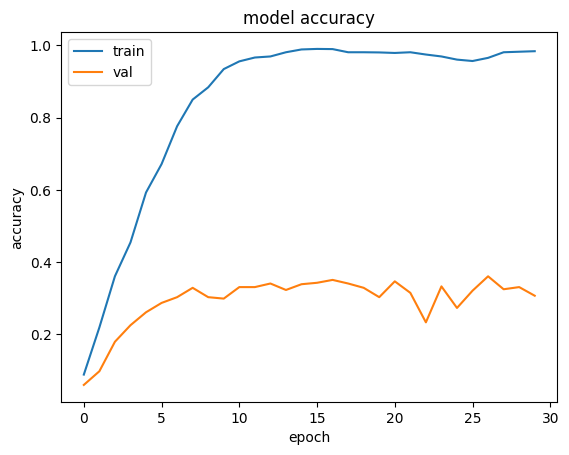

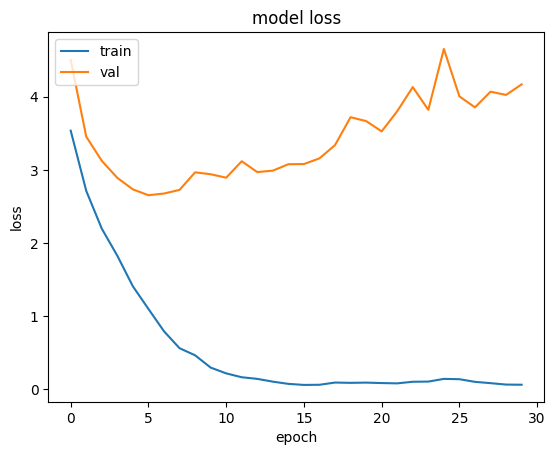

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [70]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

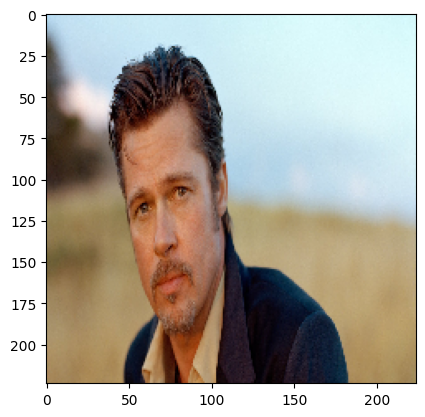

1/1 [==============================] - 0s 99ms/step
Actual: Brad Pitt
Predicted: Brad Pitt


In [71]:
predict_image("Original_Images/Original_Images/Brad Pitt/Brad Pitt_90.jpg")